# Graficas Dirichlet, solucion inciso b

Para resolver la ecuacion de laplace:
$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=0,  0<x<1, 0<y<1$$
Para las condiciones de frontera:
$$u(0,y)=10y;\frac{\partial^2 u}{\partial x^2}=-1; u(x,0)=u(x,1)=0$$

In [1]:
from pylab import *

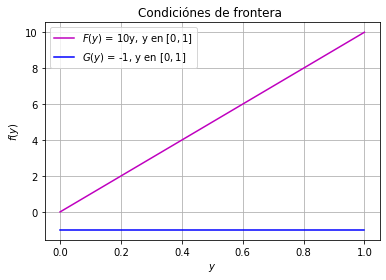

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,200)

x1 = np.linspace(0, 1,200)
y = np.linspace(0, 1,200)

plot(x1, [10*x for x in x1], color="m",label='$F(y)$ = 10y, y en $[0, 1]$')
plot(y, [-1 for x in y], color="blue",label='$G(y)$ = -1, y en $[0, 1]$')

plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Condiciónes de frontera "),grid(),legend()
show()

Para la condicion de frontera:
$$u(0,y)=10y$$

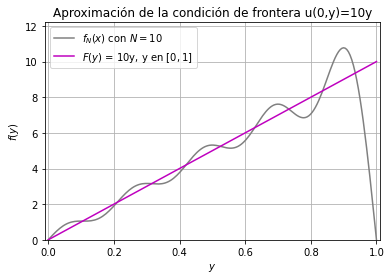

In [3]:
def u_0(x,N=10): 
    f = zeros(len(x))
    for n in range(1,N):
        f += (((-1)**(n+1))/n)*sin(n*pi*x)
    return (20.0/pi)*f
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=10$',color="gray")
plot(x1, [10*x for x in x1], 'm',label='$F(y)$ = 10y, y en $[0, 1]$')

plt.ylabel('$f(y)$'); plt.xlabel('$y$'); 
plt.title("Aproximación de la condición de frontera u(0,y)=10y")
xlim([-0.01,1.01]),ylim([0.0,12.2]),grid(),legend()
show()

En una grafica 3D

In [4]:
def u_x_y(x,y):
    N = 8
    f = zeros ((len(x),len(y)))
    for i in range(len(x)):
        for n in range(1,N):
          a = (-20*(-1)^n)/(n*pi)
          b = (2*((-1)**n-1)+20*(-1)**n*(n*pi)*sinh(n*pi))/((n*pi)**2*cosh(n*pi))
          f[:,i] += sin(n*pi*y)*(a*cosh(n*pi*x[i])+b*sinh(n*pi*x[i]))
    return f

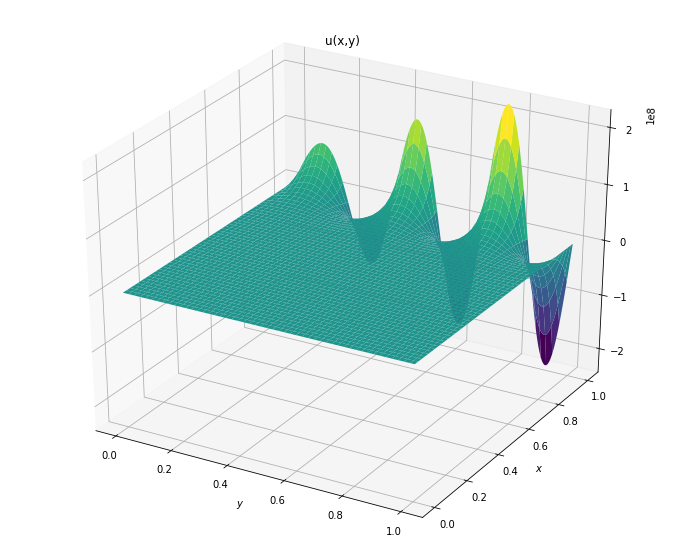

In [5]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(Y, X, U, cmap="viridis"); #Otros colores:"viridis", "inferno", "plasma"